In [1]:
import numpy as np
import pandas as pd
import utilities as utils
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression

In [2]:
rawdata = pd.read_csv("world-food-facts/FoodFacts.csv")

/Applications/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
not_null_data = rawdata[rawdata.nutrition_score_uk_100g.notnull()]

In [4]:
nutriment_cols = [col for col in not_null_data.columns if '_100g' in col and not 'score' in col]
data = not_null_data[nutriment_cols]
data = data.fillna(0) #fill nulls with 0 for now
data.shape

(31294, 94)

In [5]:
target = not_null_data.nutrition_score_uk_100g.loc[data.index.values]
target.shape

(31294,)

### Linear regression to predict nutrition score

In [6]:
x = data.as_matrix()
y = target.as_matrix()

In [7]:
x = np.array([np.concatenate((v,[1])) for v in x]) #add column of ones to the end of the data set
x

array([[  1.28400000e+03,   0.00000000e+00,   7.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  1.28400000e+03,   0.00000000e+00,   7.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  1.77000000e+02,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       ..., 
       [  6.60000000e+02,   0.00000000e+00,   6.90000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  1.64300000e+03,   0.00000000e+00,   2.80000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  2.10000000e+01,   0.00000000e+00,   2.00000000e-01, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [8]:
linreg = LinearRegression()
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
p = linreg.predict(x)
p

array([ 10.8124055 ,  10.81236084,   0.6237916 , ...,   4.36152766,
         3.80741665,  -1.74665237])

In [10]:
err = abs(p-y)
err

array([ 0.8124055 ,  0.81236084,  1.3762084 , ...,  1.63847234,
        7.80741665,  1.74665237])

In [11]:
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
rmse_train

4.6161598836408091

In [12]:
linreg.coef_ #Regression Coefficients

array([  4.56946512e-03,   1.07052625e-03,   9.15020927e-02,
         3.15416243e-01,   5.46325811e-05,   4.12197257e-06,
         2.44536582e-05,   3.46542271e-05,  -7.74730197e-01,
        -8.72104047e-06,  -2.49092606e-06,  -2.14088623e-06,
        -7.28380971e+00,   1.39256962e-06,   9.63420224e-07,
        -2.73594065e-07,  -2.56717697e-06,  -5.34030885e-07,
        -7.73083475e-02,  -4.67721137e-02,  -1.01804130e-01,
        -1.79052577e-02,   7.74656464e+00,  -4.79454024e+00,
        -3.58764905e-02,   1.46140012e-01,   1.16674779e+02,
        -6.93266581e+03,   1.65670953e-06,  -4.34358589e-02,
        -5.77655141e-02,  -2.04393863e-06,  -5.00307524e-07,
         1.10506677e-06,   1.37881475e-07,   2.43539596e-07,
         2.13370985e-03,  -1.49773278e+00,  -4.26696976e-02,
         2.14722416e-01,   1.48376435e-01,   1.69265264e-03,
        -6.52283714e-02,  -4.73007262e-02,   1.86186835e-02,
         2.22520987e-02,   1.46315436e-02,   4.31527048e-02,
        -5.69989139e-01,

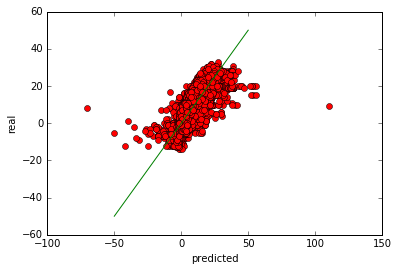

In [13]:
pl.plot(p, y,'ro')
pl.plot([-50,50],[-50,50], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

In [14]:
# RMSE with 10-Fold Cross Validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    linreg.fit(x[train],y[train])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

In [15]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 4.6162
RMSE on 10-fold CV: 1418.3081
